<a href="https://colab.research.google.com/github/singhing/ml_repo_077-/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import** **libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


**IMPORT** **DATASET**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/framingham.csv")

In [ ]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
data.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [ ]:
data['TenYearCHD']

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

In [ ]:
data.groupby('TenYearCHD').size()

TenYearCHD
0    3594
1     644
dtype: int64

In [ ]:
data.shape

(4238, 16)

In [ ]:
data.size

67808

In [ ]:
data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

**descriptive** **statistics** **of** **dataset**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
data.dropna(inplace=True, axis=0, subset=['glucose','BPMeds','totChol','education'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3693 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3693 non-null   int64  
 1   age              3693 non-null   int64  
 2   education        3693 non-null   float64
 3   currentSmoker    3693 non-null   int64  
 4   cigsPerDay       3670 non-null   float64
 5   BPMeds           3693 non-null   float64
 6   prevalentStroke  3693 non-null   int64  
 7   prevalentHyp     3693 non-null   int64  
 8   diabetes         3693 non-null   int64  
 9   totChol          3693 non-null   float64
 10  sysBP            3693 non-null   float64
 11  diaBP            3693 non-null   float64
 12  BMI              3680 non-null   float64
 13  heartRate        3692 non-null   float64
 14  glucose          3693 non-null   float64
 15  TenYearCHD       3693 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 490.5 KB


In [ ]:
numerical_columns=['cigsPerDay','BMI','heartRate']

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values= np.NaN, strategy='median')
data[numerical_columns]=imputer.fit_transform(data[numerical_columns])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3693 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3693 non-null   int64  
 1   age              3693 non-null   int64  
 2   education        3693 non-null   float64
 3   currentSmoker    3693 non-null   int64  
 4   cigsPerDay       3693 non-null   float64
 5   BPMeds           3693 non-null   float64
 6   prevalentStroke  3693 non-null   int64  
 7   prevalentHyp     3693 non-null   int64  
 8   diabetes         3693 non-null   int64  
 9   totChol          3693 non-null   float64
 10  sysBP            3693 non-null   float64
 11  diaBP            3693 non-null   float64
 12  BMI              3693 non-null   float64
 13  heartRate        3693 non-null   float64
 14  glucose          3693 non-null   float64
 15  TenYearCHD       3693 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 490.5 KB


In [ ]:
data['age'].unique()

array([39, 46, 48, 61, 43, 63, 45, 52, 50, 41, 38, 42, 44, 47, 35, 60, 36,
       59, 54, 37, 53, 49, 65, 51, 62, 40, 56, 67, 57, 66, 64, 55, 58, 68,
       34, 33, 70, 32, 69])

In [ ]:
data['male'].unique()

array([1, 0])

In [ ]:
data['heartRate'].unique()

array([ 80.,  95.,  75.,  65.,  85.,  77.,  60.,  79.,  76.,  93.,  72.,
        98.,  64.,  70.,  71.,  62.,  73.,  90.,  96.,  68.,  63.,  88.,
        78.,  83., 100.,  84.,  57.,  50.,  74.,  86.,  55.,  92.,  66.,
        87., 110.,  81.,  56.,  89.,  82.,  54.,  69.,  67.,  52.,  61.,
       140., 130.,  58., 104.,  94., 105.,  91.,  53., 108., 106.,  59.,
       107.,  48., 112., 125., 103.,  44.,  47.,  45.,  97., 122., 102.,
       120.,  99., 115., 143., 101.,  46.])

In [ ]:
data['TenYearCHD'].unique()

array([0, 1])

**VISUALISING** **DATASET**

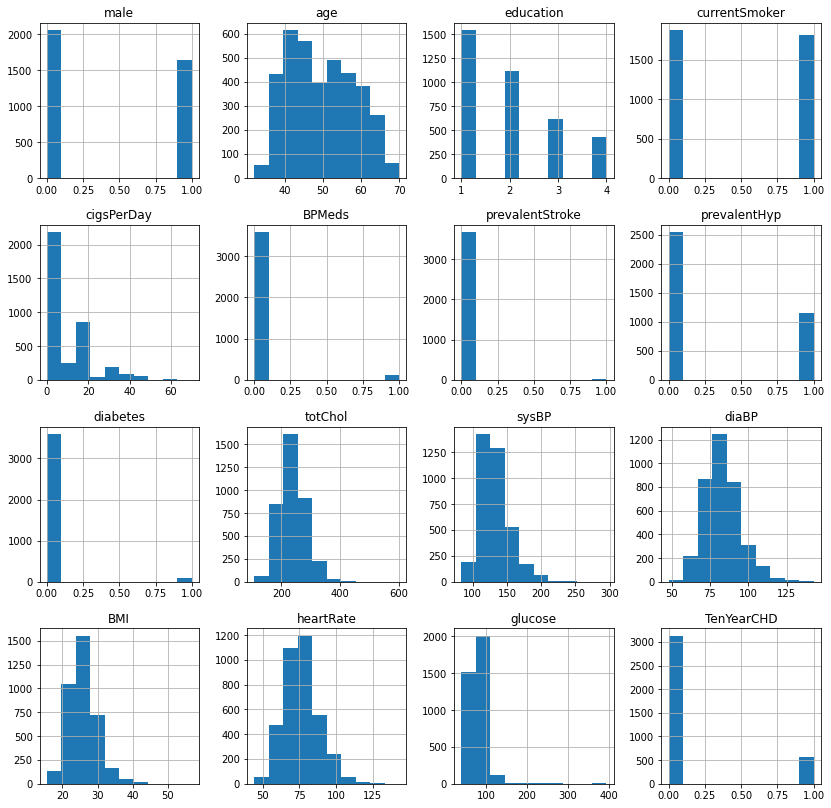

In [ ]:
data.hist(figsize=(14,14))
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


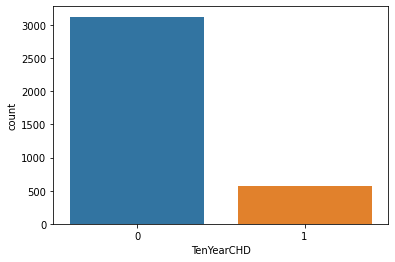

In [ ]:
count_disease=sns.countplot(x='TenYearCHD',data=data)
print(count_disease)


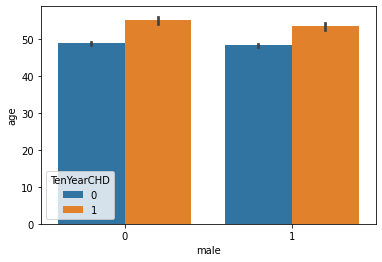

In [ ]:
sns.barplot(x=data['male'], y=data['age'], hue=data['TenYearCHD'] )
plt.show()

In [ ]:
px.bar(data,data['male'],data['TenYearCHD'])

<Figure size 864x720 with 0 Axes>

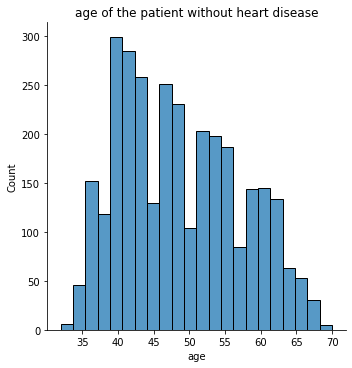

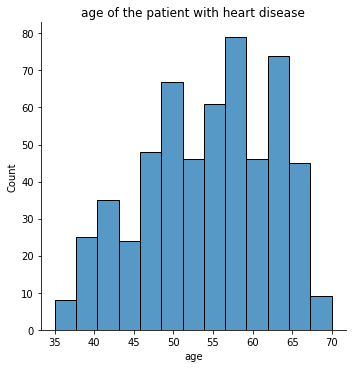

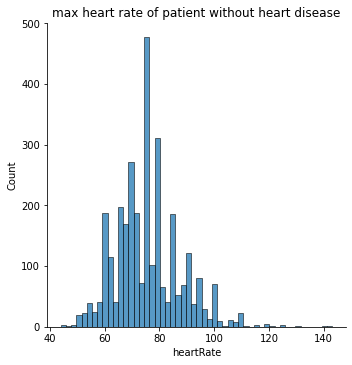

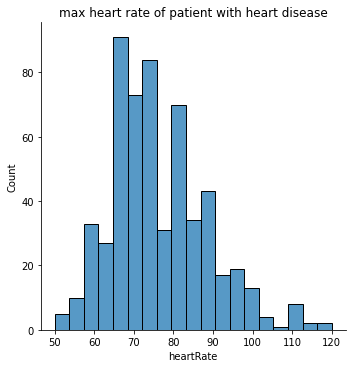

In [ ]:
#create four displots
plt.figure(figsize=(12,10))
#plt.subplot(221)
sns.displot(data[data['TenYearCHD']==0].age)
plt.title("age of the patient without heart disease")

#plt.subplot(222)
sns.displot(data[data['TenYearCHD']==1].age)
plt.title("age of the patient with heart disease")

#plt.subplot(223)
sns.displot(data[data['TenYearCHD']==0].heartRate)
plt.title("max heart rate of patient without heart disease")

#plt.subplot(223)
sns.displot(data[data['TenYearCHD']==1].heartRate)
plt.title("max heart rate of patient with heart disease")
plt.show()


<function matplotlib.pyplot.show>

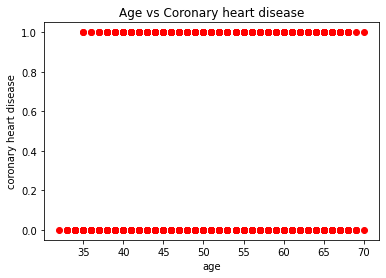

In [ ]:
plt.scatter(x=data['age'], y=data['TenYearCHD'], color='red')
plt.xlabel('age')
plt.ylabel('coronary heart disease')
plt.title('Age vs Coronary heart disease')
plt.show

<function matplotlib.pyplot.show>

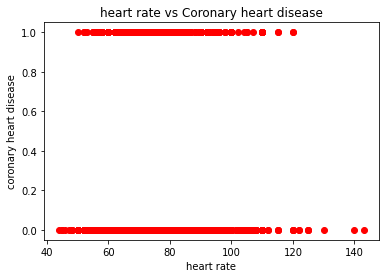

In [ ]:
plt.scatter(y=data['TenYearCHD'], x=data['heartRate'], color='red')
plt.xlabel('heart rate')
plt.ylabel('coronary heart disease')
plt.title('heart rate vs Coronary heart disease')
plt.show

<function matplotlib.pyplot.show>

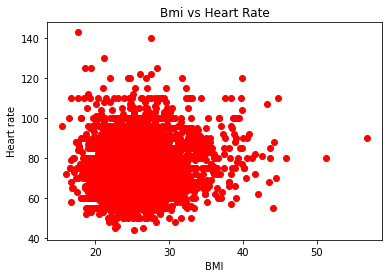

In [ ]:
plt.scatter(x=data['BMI'], y=data['heartRate'], color='red')
plt.xlabel('BMI')
plt.ylabel('Heart rate')
plt.title('Bmi vs Heart Rate')
plt.show

<function matplotlib.pyplot.show>

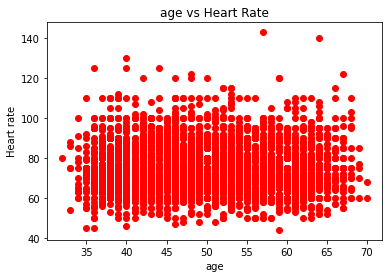

In [ ]:
plt.scatter(x=data['age'], y=data['heartRate'], color='red')
plt.xlabel('age')
plt.ylabel('Heart rate')
plt.title('age vs Heart Rate')
plt.show

<function matplotlib.pyplot.show>

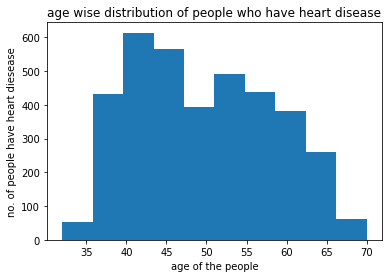

In [ ]:
plt.hist(data['age'], bins=10)
plt.xlabel("age of the people")
plt.ylabel("no. of people have heart diesease")
plt.title("age wise distribution of people who have heart disease")
plt.show

<function matplotlib.pyplot.show>

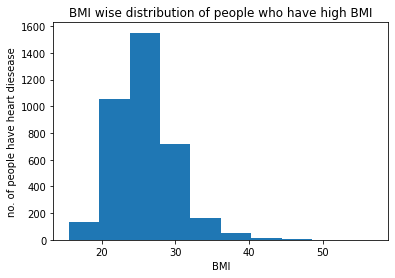

In [ ]:
plt.hist(data['BMI'], bins=10)
plt.xlabel("BMI")
plt.ylabel("no. of people have heart diesease")
plt.title("BMI wise distribution of people who have high BMI")
plt.show

**DATA** **PREPROCESSING**

In [ ]:

X = data.drop(['TenYearCHD'],axis=1)
y= data['TenYearCHD']

In [ ]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

In [ ]:
scaled_X

array([[ 1.1200798 , -1.23310919,  1.97783189, ...,  0.29154269,
         0.35378757, -0.20390672],
       [-0.89279353, -0.41622926,  0.02040641, ...,  0.72526731,
         1.60454146, -0.24542099],
       [ 1.1200798 , -0.18283499, -0.95830632, ..., -0.11014545,
        -0.06313039, -0.49450666],
       ...,
       [ 1.1200798 ,  0.05055928, -0.95830632, ...,  0.04510825,
        -0.81358272,  0.16972179],
       [ 1.1200798 ,  0.16725641,  0.99911915, ..., -1.49757137,
        -0.89696631, -0.57753522],
       [-0.89279353,  0.28395354,  0.02040641, ..., -1.06384675,
         0.35378757,  1.04152164]])

In [ ]:
scaled_X.shape

(3693, 15)

In [ ]:
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0


In [ ]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3693, dtype: int64

In [ ]:
y.size

3693

In [ ]:
X.size

55395

In [ ]:
#Implementing cross validation
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.8349120433017592, 0.871447902571042, 0.8457374830852503, 0.8563685636856369, 0.8455284552845529]
Avg accuracy : 0.8507988895856483


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(scaled_X,y, random_state=101, test_size=0.3, stratify=y)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',max_depth=6)
adaboost=AdaBoostClassifier(base_estimator=model,n_estimators=500,learning_rate=0.3)
boostmodel=adaboost.fit(X_train,y_train)
y_pred=boostmodel.predict(X_test)



In [ ]:
prediction=metrics.accuracy_score(y_pred,y_test)
print(prediction)

0.842057761732852


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
model=svm.SVC(kernel='rbf',C=20,gamma='auto')
from xgboost import XGBClassifier

xg_boost=XGBClassifier(base_estimator=model,n_estimators=100,learning_rate=0.3,max_depth=8,random_state=50,objective='multi:softmax',booster='dart',num_class=6)
boostmodel=xg_boost.fit(X_train,y_train)
y_pred=boostmodel.predict(X_test)
prediction=metrics.accuracy_score(y_pred,y_test)
print(prediction)


0.8402527075812274


In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC 
rand_cls=RFC(n_estimators=100,criterion='gini',max_depth=8,max_features='auto',min_samples_split=8,bootstrap=True) 
from xgboost import XGBClassifier

xg_boost=XGBClassifier(base_estimator=rand_cls,n_estimators=100,learning_rate=0.3,max_depth=8,random_state=50,objective='multi:softmax',booster='dart',num_class=6)
boostmodel=xg_boost.fit(X_train,y_train)
y_pred=boostmodel.predict(X_test)
prediction=metrics.accuracy_score(y_pred,y_test)
print(prediction)


0.8402527075812274


In [ ]:
from sklearn import svm
from xgboost import XGBClassifier
from sklearn import model_selection
clf=XGBClassifier
seed=128
num_trees=100
kfold=model_selection.KFold(n_splits=20,random_state=128,shuffle=True)
model=XGBClassifier(n_estimators=num_trees,random_state=seed)
results=model_selection.cross_val_score(model,X_test,y_test,cv=kfold)
print(results.mean())

0.8503409090909091


In [ ]:
from sklearn import svm
model=svm.SVC(kernel='rbf',C=1,gamma='auto')
model.fit(X_train,y_train)
svm_acc=model.score(X_test,y_test)
print(svm_acc)

0.8483754512635379


In [ ]:
from sklearn import svm
model=svm.SVC(kernel='linear',C=20,gamma='auto')
model.fit(X_train,y_train)
svm_acc=model.score(X_test,y_test)
print(svm_acc)

0.8465703971119134


In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing=1e-9, priors=None)
GNB.fit(X_train,y_train)
NB_acc=GNB.score(X_test,y_test)
print(NB_acc)


0.8348375451263538


In [ ]:
from sklearn.model_selection import  cross_val_score

In [ ]:
'''kernals=['rbf','linear']
C=[1,10,20]
avg_score={}
for kval in kernals:
  for cval in C:
    cv_scores=cross_val_score(svm.SVC(kernel=kval, gamma='auto'),X,y, cv=5)
    avg_score[kval + '_'+ str(cval)]=np.average(cv_scores)'''



"kernals=['rbf','linear']\nC=[1,10,20]\navg_score={}\nfor kval in kernals:\n  for cval in C:\n    cv_scores=cross_val_score(svm.SVC(kernel=kval, gamma='auto'),X,y, cv=5)\n    avg_score[kval + '_'+ str(cval)]=np.average(cv_scores)"

In [ ]:
#avg_score

In [ ]:
X_train.shape

(2585, 15)

In [ ]:
X_test.shape

(1108, 15)

In [ ]:
y_test.size

1108

**logistic** **regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_lr=accuracy_score(y_test,y_pred)*100

In [ ]:
accuracy_lr

85.1985559566787

**Confusion** **Matrix**

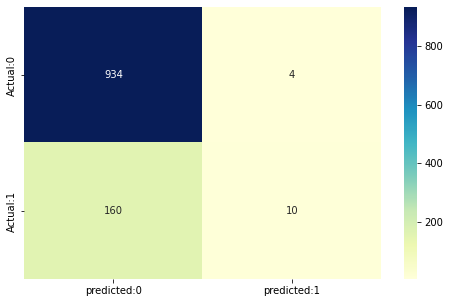

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['predicted:0','predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

the cm shows 934+10=944 correct prediction and 160+4=164 incorrect ones

In [ ]:
TN=cm[0,1]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

Model Evaluation-statistic 

In [ ]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',
'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.07865168539325842 
 The Missclassification = 1-Accuracy =  0.9213483146067416 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.058823529411764705 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.5 
 Positive Predictive value = TP/(TP+FP) =  0.7142857142857143 
 Negative predictive Value = TN/(TN+FN) =  0.024390243902439025 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  0.11764705882352941 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  1.8823529411764706


**DECISION** **TREE** **ALGORITHM**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_features=12)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_features=12)

In [ ]:
X_test

array([[-0.89279353,  1.56762201, -0.95830632, ..., -1.16734922,
         0.77070553, -0.36996383],
       [-0.89279353, -0.76632066, -0.95830632, ..., -0.84452009,
        -1.48065146, -0.49450666],
       [ 1.1200798 , -0.64962352,  0.02040641, ..., -0.86177051,
        -0.89696631,  0.00366468],
       ...,
       [-0.89279353, -1.23310919,  0.99911915, ..., -0.03621512,
        -0.06313039, -0.28693527],
       [-0.89279353,  1.10083348, -0.95830632, ..., -0.1126098 ,
        -0.06313039, -0.57753522],
       [-0.89279353, -0.18283499, -0.95830632, ...,  0.69323083,
        -0.06313039, -0.28693527]])

In [ ]:
prediction=dt.predict(X_test)

In [ ]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

316     0
1004    0
58      0
3721    0
1223    0
       ..
2272    0
4224    0
1734    0
1197    0
1742    0
Name: TenYearCHD, Length: 1108, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_dt=accuracy_score(y_test,prediction)*100

In [ ]:
accuracy_dt

77.6173285198556

In [ ]:
dt.feature_importances_

array([0.01815438, 0.1278368 , 0.03841643, 0.00260394, 0.03847578,
       0.00541867, 0.00525039, 0.01972209, 0.        , 0.14006067,
       0.15868478, 0.12811157, 0.13217317, 0.06975454, 0.11533679])

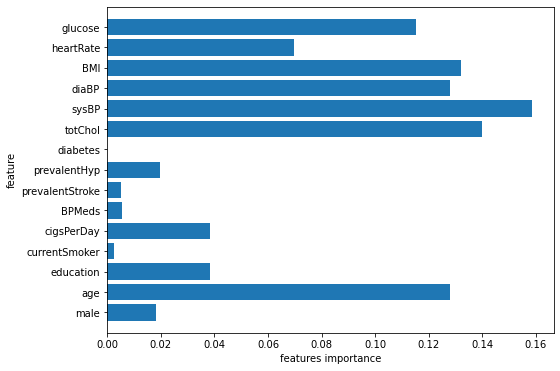

In [ ]:
def plot_feature_importance(model):
  plt.figure(figsize=(8,6))
  n_features=15
  plt.barh(range(n_features),model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features),X)
  plt.xlabel("features importance")
  plt.ylabel("feature")
  plt.ylim(-1,n_features)

plot_feature_importance(dt)


In [ ]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [ ]:
category=['No you dont have heart disease','Yes you have heart disease']

In [ ]:
custom_data=np.array([[1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,66.0,86.0]])

In [ ]:
custum_data_prediction_dt=dt.predict(custom_data)

In [ ]:
custum_data_prediction_dt

array([1])

In [ ]:
print(category[int(custum_data_prediction_dt)])

Yes you have heart disease


In [ ]:
custom_data=np.array([[1,89,1.0,0,0.0,0.0,0,0,0,313.0,179.0,150.0,19.10,100.0,109.0]])

In [ ]:
custum_data_prediction_dt=dt.predict(custom_data)

In [ ]:
custum_data_prediction_dt

array([1])

In [ ]:
print(category[int(custum_data_prediction_dt)])

Yes you have heart disease


KNN ALGORITHM

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20,weights='distance',n_jobs=10,algorithm='brute',leaf_size=15,p=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=15, n_jobs=10, n_neighbors=20,
                     p=1, weights='distance')

In [ ]:
prediction_knn=knn.predict(X_test)

In [ ]:
accuracy_knn=accuracy_score(y_test,prediction_knn)

In [ ]:
accuracy_knn

0.8474729241877257

In [ ]:
custom_data_knn=np.array([[0,60,19.0,1,20.0,0.0,50,1,0,313.0,179.0,100.0,99.97,77.0,100.0]])

In [ ]:
custom_data_prediction_knn=knn.predict(custom_data_knn)

In [ ]:
custom_data_prediction_knn

array([0])

In [ ]:
print(category[int(custom_data_prediction_knn)])

No you dont have heart disease


**Random** **forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC 
rand_cls=RFC(n_estimators=500,criterion='gini',max_depth=8,max_features='auto',min_samples_split=8,bootstrap=True) 


In [ ]:
rand_cls.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=8, n_estimators=500)

In [ ]:
prediction_rfc=rand_cls.predict(X_test)
accuracy_rfc=accuracy_score(y_test,prediction_rfc)
print(accuracy_rfc)

0.8510830324909747


In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC 
rand_cls=RFC(n_estimators=500,criterion='gini',max_depth=8,max_features='auto',min_samples_split=8,bootstrap=True)
k = 5
kf = KFold(n_splits=k, random_state=None)

acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
     
    rand_cls.fit(X_train,y_train)
    pred_values = rand_cls.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))


accuracy of each fold - [0.8267929634641408, 0.8673883626522327, 0.8457374830852503, 0.8590785907859079, 0.8401084010840109]
Avg accuracy : 0.8478211602143085


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_features=12)
k = 10
kf = KFold(n_splits=k, random_state=None)

acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
     
    dt.fit(X_train,y_train)
    pred_values = dt.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))


accuracy of each fold - [0.7513513513513513, 0.7621621621621621, 0.7486486486486487, 0.7479674796747967, 0.7696476964769647, 0.7777777777777778, 0.7804878048780488, 0.7804878048780488, 0.7452574525745257, 0.7452574525745257]
Avg accuracy : 0.760904563099685


In [ ]:
custom_data_rfc=np.array([[0,60,19.0,1,20.0,0.0,50,1,0,313.0,179.0,100.0,99.97,77.0,100.0]])

In [ ]:
custom_data_prediction_rfc=rand_cls.predict(custom_data_rfc)

In [ ]:
custom_data_prediction_rfc

array([1])

In [ ]:
print(category[int(custom_data_prediction_rfc)])

Yes you have heart disease


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [ ]:
pred_dt=dt.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2188
           1       1.00      1.00      1.00       397

    accuracy                           1.00      2585
   macro avg       1.00      1.00      1.00      2585
weighted avg       1.00      1.00      1.00      2585



In [ ]:
pred_dt_test=dt.predict(X_test)

In [ ]:
print(classification_report(y_test,pred_dt_test))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       938
           1       0.26      0.26      0.26       170

    accuracy                           0.77      1108
   macro avg       0.56      0.56      0.56      1108
weighted avg       0.77      0.77      0.77      1108



**`**ensemble**`** **model** **bootstrapping**

In [ ]:
custom_data_dtt=np.array([[1,60,19.0,1,20.0,0.0,50,1,0,140.0,43.0,55.0,99.97,77.0,10.0]])

In [ ]:
!pip install -U scikit-learn

In [ ]:
from sklearn.ensemble import BaggingClassifier as BC
classifier=BC()
classifier.fit(X_train,y_train)

BaggingClassifier()

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
classifier=BC(base_estimator=lr(),
              n_estimators=150,
              n_jobs=-1,
              random_state=32)
classifier.fit(X_train,y_train)
predicted_values=classifier.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2188
           1       0.74      0.09      0.15       397

    accuracy                           0.85      2585
   macro avg       0.80      0.54      0.54      2585
weighted avg       0.84      0.85      0.80      2585



In [ ]:
from sklearn.metrics import classification_report
predicted_values=classifier.predict(X_test)
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       938
           1       0.69      0.05      0.10       170

    accuracy                           0.85      1108
   macro avg       0.77      0.52      0.51      1108
weighted avg       0.83      0.85      0.79      1108



In [ ]:
import xgboost as xgb
train=xgb.DMatrix(X_train, label=y_train)
test=xgb.DMatrix(X_test, label=y_test)

In [ ]:
param={
    'max_depth':6,
    'eta':0.3,
    'objective':'multi:softmax',
    'num_class':15,
    'feature_selector':'cyclic',
    'single_precision_histogram':'false'}
epochs=10

In [ ]:
model=xgb.train(param,train,epochs)
prediction=model.predict(test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.8510830324909747

In [ ]:
x = data.drop(['TenYearCHD','education','prevalentStroke','prevalentHyp','BPMeds','currentSmoker','diabetes'],axis=1)
y= data['TenYearCHD']

In [ ]:
x.head()

,male,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0


In [ ]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_X,y, random_state=101, test_size=0.3, stratify=y)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier as RFC 
rand_cls=RFC(n_estimators=500,criterion='gini',max_depth=8,max_features='auto',min_samples_split=8,bootstrap=True) 


In [ ]:

rand_cls.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=8, n_estimators=500)

In [ ]:
prediction_rfc=rand_cls.predict(x_test)
accuracy_rfc=accuracy_score(y_test,prediction_rfc)
print(accuracy_rfc)

0.8510830324909747


In [ ]:
import xgboost as xgb
train=xgb.DMatrix(x_train, label=y_train)
test=xgb.DMatrix(x_test, label=y_test)

In [ ]:
param={
    'max_depth':6,
    'eta':0.01,
    'objective':'multi:softmax',
    'num_class':10,
    'feature_selector':'cyclic',
    'single_precision_histogram':'false'}
epochs=50

In [ ]:
model=xgb.train(param,train,epochs)
prediction=model.predict(test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.8483754512635379

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing=1e-9, priors=None)
GNB.fit(x_train,y_train)
NB_acc=GNB.score(x_test,y_test)
print(NB_acc)

0.8411552346570397


In [ ]:
from sklearn import svm
from xgboost import XGBClassifier
from sklearn import model_selection
clf=XGBClassifier
seed=28
num_trees=100
kfold=model_selection.KFold(n_splits=30,random_state=28,shuffle=True)
model=XGBClassifier(n_estimators=num_trees,random_state=seed)
results=model_selection.cross_val_score(model,x_test,y_test,cv=kfold)
print(results.mean())

0.8547297297297297


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=30,weights='distance',n_jobs=20,algorithm='brute',leaf_size=20,p=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=20, n_jobs=20, n_neighbors=30,
                     p=1, weights='distance')

In [ ]:
prediction_knn=knn.predict(x_test)

In [ ]:
accuracy_knn=accuracy_score(y_test,prediction_knn)

In [ ]:
accuracy_knn

0.8501805054151624

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=30,weights='distance',n_jobs=20,algorithm='brute',leaf_size=20,p=1)
k = 15
kf = KFold(n_splits=k, random_state=None)

acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
     
    knn.fit(X_train,y_train)
    pred_values = knn.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))


accuracy of each fold - [0.805668016194332, 0.8461538461538461, 0.8299595141700404, 0.8333333333333334, 0.8821138211382114, 0.8861788617886179, 0.8495934959349594, 0.8455284552845529, 0.8373983739837398, 0.8455284552845529, 0.8455284552845529, 0.8658536585365854, 0.8414634146341463, 0.8414634146341463, 0.8333333333333334]
Avg accuracy : 0.8459398966459302


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',max_depth=6)
adaboost=AdaBoostClassifier(base_estimator=model,n_estimators=500,learning_rate=0.1)
boostmodel=adaboost.fit(x_train,y_train)
y_pred=boostmodel.predict(x_test)
prediction=metrics.accuracy_score(y_pred,y_test)
print(prediction)


0.8429602888086642


In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC 
rand_cls=RFC(n_estimators=100,criterion='entropy',max_depth=8,max_features='auto',min_samples_split=8,bootstrap=True) 
from xgboost import XGBClassifier

xg_boost=XGBClassifier(base_estimator=rand_cls,n_estimators=500,learning_rate=0.01,max_depth=8,random_state=28,objective='multi:softmax',booster='dart',num_class=6)
boostmodel=xg_boost.fit(x_train,y_train)
y_pred=boostmodel.predict(x_test)
prediction=metrics.accuracy_score(y_pred,y_test)
print(prediction)


0.8456678700361011


In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC 
rand_cls=RFC(n_estimators=100,criterion='entropy',max_depth=8,max_features='auto',min_samples_split=8,bootstrap=True) 
from xgboost import XGBModel

xg_boost=XGBModel(base_estimator=rand_cls,n_estimators=100,learning_rate=0.3,max_depth=8,random_state=28,objective='multi:softmax',booster='dart',num_class=6)
boostmodel=xg_boost.fit(x_train,y_train)
y_pred=boostmodel.predict(x_test)
prediction=metrics.accuracy_score(y_pred,y_test)
print(prediction)

0.8357400722021661


In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC 
rand_cls=RFC(n_estimators=100,criterion='entropy',max_depth=8,max_features='auto',min_samples_split=8,bootstrap=True) 
from xgboost import XGBModel

xg_boost=XGBModel(base_estimator=rand_cls,n_estimators=100,learning_rate=0.3,max_depth=8,random_state=28,objective='multi:softmax',booster='dart',num_class=6)
boostmodel=xg_boost.fit(X_train,y_train)
y_pred=boostmodel.predict(X_test)
prediction=metrics.accuracy_score(y_pred,y_test)
print(prediction)

0.8402527075812274


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_lr=accuracy_score(y_test,y_pred)*100

In [ ]:
accuracy_lr

84.92779783393502

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
pred_dt=dt.predict(x_train)
from sklearn.metrics import classification_report
print(classification_report(y_train,pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2188
           1       1.00      1.00      1.00       397

    accuracy                           1.00      2585
   macro avg       1.00      1.00      1.00      2585
weighted avg       1.00      1.00      1.00      2585



In [ ]:
pred_dt=dt.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       938
           1       0.23      0.25      0.24       170

    accuracy                           0.76      1108
   macro avg       0.55      0.55      0.55      1108
weighted avg       0.77      0.76      0.76      1108

